Episode  1, epsilon   0.98, batch size  200, ep return 7915397.5
Episode  2, epsilon   0.96, batch size  400, ep return 10480155.6
Episode  3, epsilon   0.94, batch size  600, ep return 7031763.2
Episode  4, epsilon   0.92, batch size  800, ep return 8749066.6
Episode  5, epsilon   0.90, batch size 1000, ep return 8858169.1
Episode  6, epsilon   0.88, batch size 1200, ep return 14273003.4
Episode  7, epsilon   0.86, batch size 1400, ep return 10005927.9
Episode  8, epsilon   0.84, batch size 1600, ep return 6077183.8
Episode  9, epsilon   0.82, batch size 1800, ep return 10486350.6
Episode 10, epsilon   0.80, batch size 2000, ep return 14183689.6
Episode 11, epsilon   0.78, batch size 2200, ep return 7790088.8
Episode 12, epsilon   0.76, batch size 2400, ep return 7464356.7
Episode 13, epsilon   0.74, batch size 2600, ep return 8187141.1
Episode 14, epsilon   0.72, batch size 2800, ep return 7517358.2
Episode 15, epsilon   0.71, batch size 3000, ep return 8920667.3
Episode 16, epsilon 

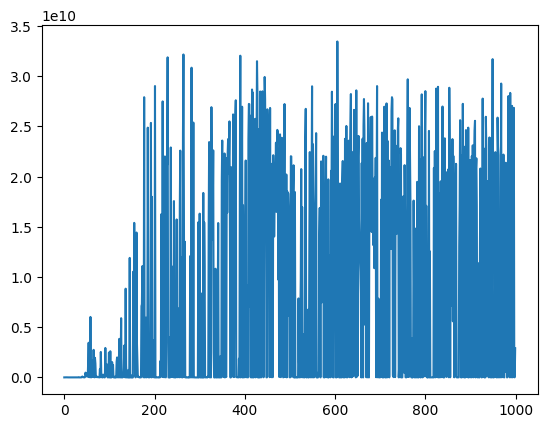

In [1]:
from train import ProjectAgent
from env_hiv import HIVPatient
from gymnasium.wrappers import TimeLimit
from train import ReplayBuffer
import torch.nn as nn
from train import HIVcnn
import numpy as np
import torch
from evaluate import evaluate_HIV
import matplotlib.pyplot as plt

agent = ProjectAgent()
env = TimeLimit(
    env=HIVPatient(domain_randomization=True), max_episode_steps=200
)
ep_return = agent.train(env, 1000)
agent.save("model-HIV2.pth")
plt.plot(ep_return)

Episode  1, epsilon   0.98, batch size 20000, ep return 13930835.1
Episode  2, epsilon   0.96, batch size 20000, ep return 11615129.1
Episode  3, epsilon   0.94, batch size 20000, ep return 8819941.8
Episode  4, epsilon   0.92, batch size 20000, ep return 9274826.5
Episode  5, epsilon   0.90, batch size 20000, ep return 6926135.1
Episode  6, epsilon   0.88, batch size 20000, ep return 12209912.6
Episode  7, epsilon   0.86, batch size 20000, ep return 9475697.4
Episode  8, epsilon   0.84, batch size 20000, ep return 9269032.5
Episode  9, epsilon   0.82, batch size 20000, ep return 12059636.5
Episode 10, epsilon   0.80, batch size 20000, ep return 9787255.2
Episode 11, epsilon   0.78, batch size 20000, ep return 11282261.3
Episode 12, epsilon   0.76, batch size 20000, ep return 9595333.3
Episode 13, epsilon   0.74, batch size 20000, ep return 7858570.5
Episode 14, epsilon   0.72, batch size 20000, ep return 6304766.0
Episode 15, epsilon   0.71, batch size 20000, ep return 7461419.2
Episo

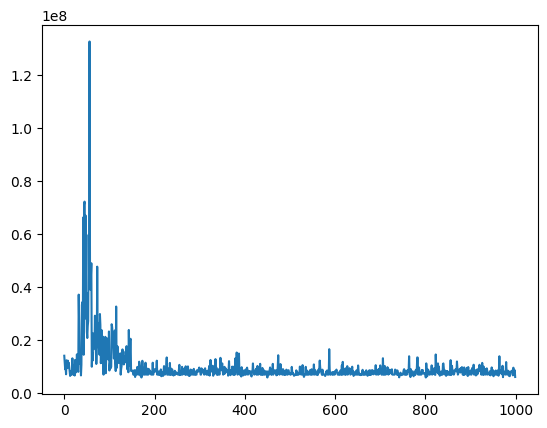

In [5]:
env = TimeLimit(
    env=HIVPatient(domain_randomization=False), max_episode_steps=200
)
ep_return = agent.train(env, 1000)
agent.save("model-HIV3.pth")
plt.plot(ep_return)

In [6]:
obs, info = env.reset()
done = False
truncated = False
episode_reward = 0
while not done and not truncated:
    action = agent.act(obs)
    print(action)
    obs, reward, done, truncated, _ = env.step(action)
    episode_reward += reward
print(episode_reward)

3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6787976.815833555


In [7]:
from evaluate import evaluate_HIV, evaluate_HIV_population

score_agent: float = evaluate_HIV(agent=agent, nb_episode=5)
score_agent_dr: float = evaluate_HIV_population(agent=agent, nb_episode=20)
print(f"Score agent: {score_agent}")
print(f"Score agent with domain randomization: {score_agent_dr}")

Score agent: 6787976.815833555
Score agent with domain randomization: 2469692349.0636177


In [10]:
np.mean(ep_return)

np.float64(9483919.102602638)

In [4]:
from evaluate import evaluate_HIV, evaluate_HIV_population

score_agent_dr: float = evaluate_HIV_population(agent=agent, nb_episode=20)
print(score_agent_dr)

1598458882.595654


In [ ]:
agent = ProjectAgent()
env = TimeLimit(
    env=HIVPatient(domain_randomization=True), max_episode_steps=200
)
ep_return = agent.train(env, 1000)
agent.save_model("model-HIV.pth")